In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex
from scipy import stats 
from scipy import signal
from scipy import interpolate
from scipy.io import wavfile 
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import fontManager  
import os 
import lasio
from mpl_toolkits.mplot3d import Axes3D
import cv2
from scipy import io

In [11]:
fs, x1 = wavfile.read('./audio source/Speech - Music Separation/Microphone1.wav')
fs, x2 = wavfile.read('./audio source/Speech - Music Separation/Microphone2.wav')
X1=[x1.copy(),x2.copy()]
fs, _  = wavfile.read('./audio source/Speech - Music Separation/SeparatedSource1.wav')
fs, s2 = wavfile.read('./audio source/Speech - Music Separation/SeparatedSource2.wav')

fs, x1 = wavfile.read('./audio source/Speech - Speech Separation/Microphone1.wav')
fs, x2 = wavfile.read('./audio source/Speech - Speech Separation/Microphone2.wav')
X2=[x1.copy(),x2.copy()]
fs, s1  = wavfile.read('./audio source/Speech - Speech Separation/SeparatedSource1.wav')
fs, _ = wavfile.read('./audio source/Speech - Speech Separation/SeparatedSource2.wav')

fs, x1 = wavfile.read('./audio source/Speech - Speech Separation in difficult environments/Microphone1.wav')
fs, x2 = wavfile.read('./audio source/Speech - Speech Separation in difficult environments/Microphone2.wav')
X3=[x1.copy(),x2.copy()]
fs, _ = wavfile.read('./audio source/Speech - Speech Separation in difficult environments/SeparatedSource1.wav')
fs, s3 = wavfile.read('./audio source/Speech - Speech Separation in difficult environments/SeparatedSource2.wav')

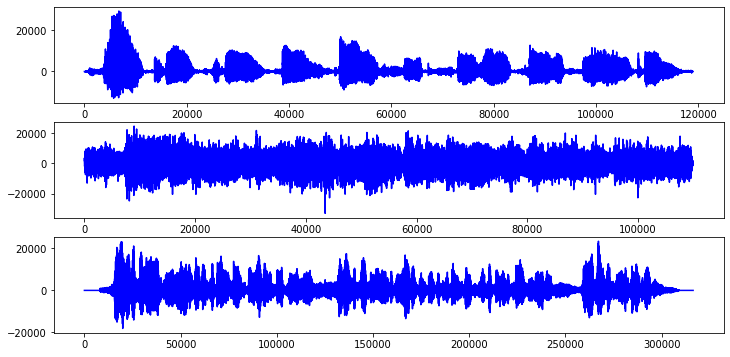

In [12]:
plt.subplots(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,s1.shape[0],s1.shape[0]),s1,'-b')
plt.subplot(3,1,2)
plt.plot(np.linspace(0,s2.shape[0],s2.shape[0]),s2,'-b')
plt.subplot(3,1,3)
plt.plot(np.linspace(0,s3.shape[0],s3.shape[0]),s3,'-b')

In [123]:
N=8000
p=3
S =[s1,s2,s3]
X =np.zeros((N,p),dtype=float)
for i in range(p):
    s =S[i]
    r =int(s.shape[0]//N)
    for j in range(N):
        X[j,i] =s[j*r]
X =(X-np.mean(X,axis=0)[np.newaxis,:])/np.std(X,axis=0)[np.newaxis,:]

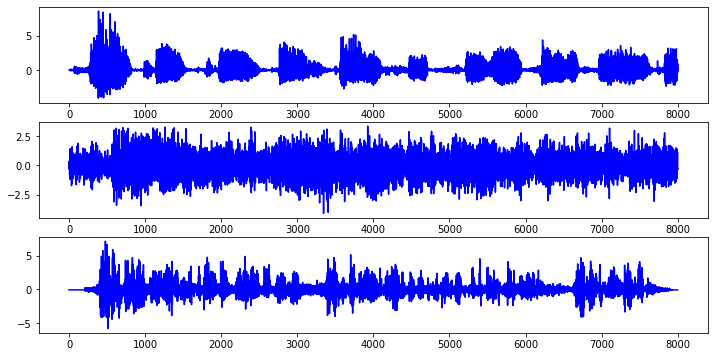

In [124]:
plt.subplots(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,N,N),X[:,0],'-b')
plt.subplot(3,1,2)
plt.plot(np.linspace(0,N,N),X[:,1],'-b')
plt.subplot(3,1,3)
plt.plot(np.linspace(0,N,N),X[:,2],'-b')

In [125]:
io.savemat('sources2.mat', {'sources':X})

In [8]:
sources=io.loadmat('sources2.mat')['sources']

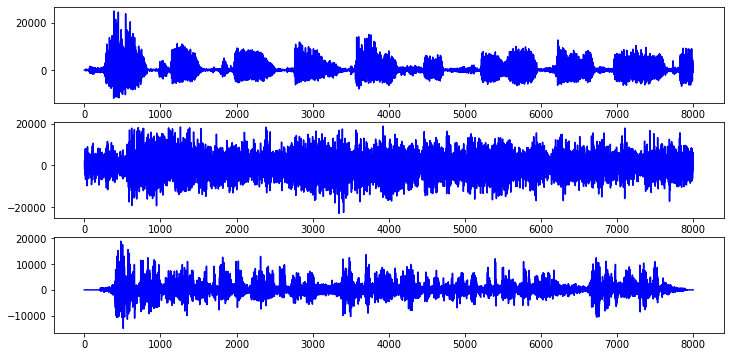

In [9]:
plt.subplots(figsize=(12,6))
for i in range(sources.shape[1]):
    plt.subplot(sources.shape[1],1,i+1)
    plt.plot(np.linspace(0,sources.shape[0],sources.shape[0]),sources[:,i],'-b')

In [21]:
N =8000
X =np.zeros((N,2),dtype=float)
for i in range(2):
    x =X3[i]
    r =int(x.shape[0]//N)
    for j in range(N):
        X[j,i] =x[j*r]

In [22]:
io.savemat('SpeechSpeechSeparationindifficultenvironments.mat', {'mixtures':X})

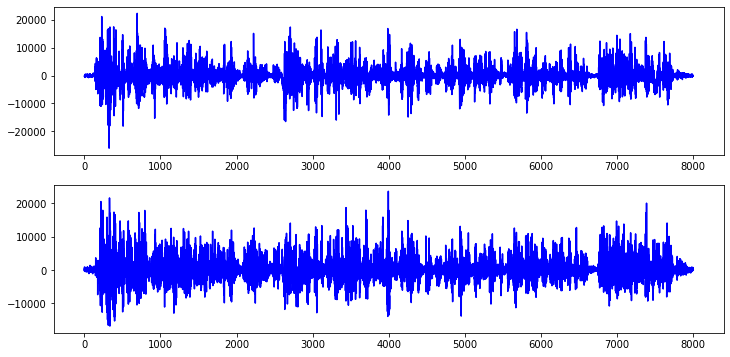

In [23]:
sources=io.loadmat('SpeechSpeechSeparationindifficultenvironments.mat')['mixtures']
plt.subplots(figsize=(12,6))
for i in range(sources.shape[1]):
    plt.subplot(sources.shape[1],1,i+1)
    plt.plot(np.linspace(0,sources.shape[0],sources.shape[0]),sources[:,i],'-b')

corr  0.010162968922706806
corr  0.0


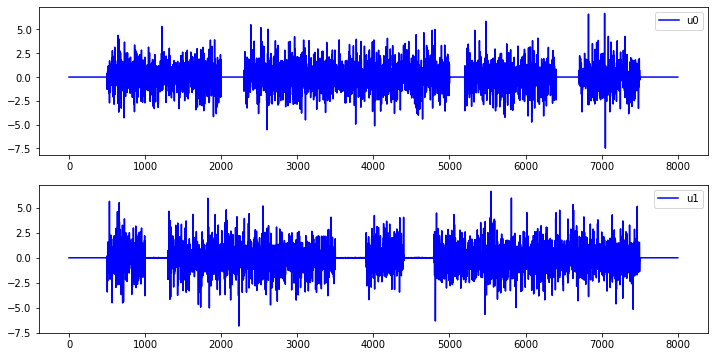

In [117]:
U =np.zeros((8000,2))
scales=[2,7]
for i in range(2):
    if(i==0):
        U[500:7500,i] =np.random.laplace(0,scales[i],7000)
        U[2000:2300,i]=0.0
        U[5000:5200,i]=0.0
        U[6400:6700,i]=0.0
    else:
        U[500:7500,i] =np.random.laplace(0,scales[i],7000)
        U[1000:1300,i]=0.0
        U[3500:3900,i]=0.0
        U[4400:4800,i]=0.0
print('corr ',np.sum(U[:,0]*U[:,1])/(np.linalg.norm(U[:,0])*np.linalg.norm(U[:,1])))
U[:,1] =U[:,1]-(np.sum(U[:,0]*U[:,1])/(np.sum(np.square(U[:,0]))))*U[:,0]
print('corr ',np.sum(U[:,0]*U[:,1])/(np.linalg.norm(U[:,0])*np.linalg.norm(U[:,1])))
plt.subplots(figsize=(12,6))

U =(U-np.mean(U,axis=0)[np.newaxis,:])/np.std(U,axis=0)[np.newaxis,:]
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.plot(np.linspace(0,8000,8000),U[:,i],'-b',label='u'+str(i))
    plt.legend()

In [139]:
A =np.zeros((2,2,2))
B =np.zeros((20,2,2))
for i in range(2):
    A[i,:,:]=np.random.normal(loc=0,scale=0.9,size=(2,2))
A =A*0
for i in range(20):
    B[i,:,:]=np.random.normal(loc=0,scale=0.9,size=(2,2))
B =B*0
B[2,0,0]=1.0
B[2,0,1]=0.5
B[3,1,0]=0.5
B[3,1,1]=1.0
X =np.zeros((8000,2),dtype=float)
for i in range(500,7600):
    for j in range(2):
        X[i,:] =X[i,:] +(A[j,:,:]@(X[i-j-1,:][:,np.newaxis]))[:,0]
    for j in range(20):
        X[i,:] =X[i,:] +(B[j,:,:]@(U[i-j-1,:][:,np.newaxis]))[:,0]


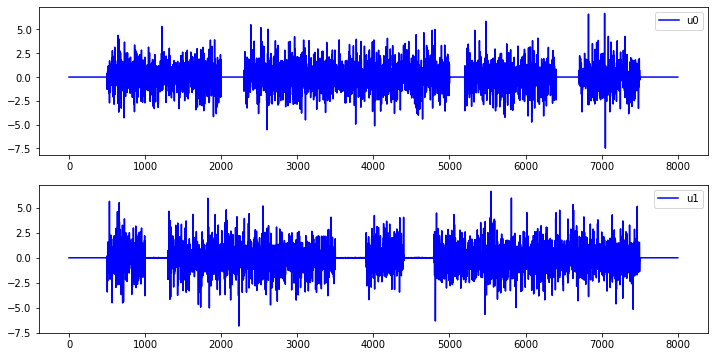

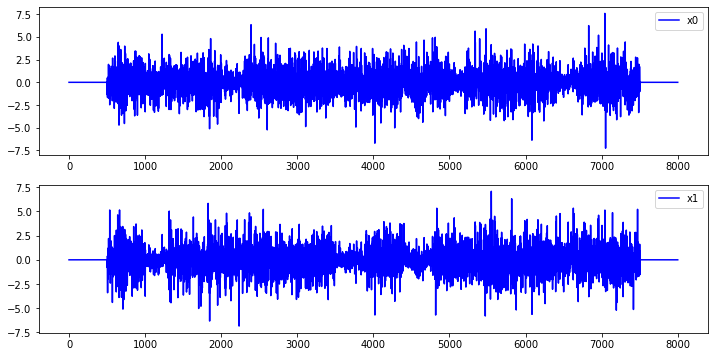

In [140]:
plt.subplots(figsize=(12,6))
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.plot(np.linspace(0,8000,8000),U[:,i],'-b',label='u'+str(i))
    plt.legend()

plt.subplots(figsize=(12,6))
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.plot(np.linspace(0,8000,8000),X[:,i],'-b',label='x'+str(i))
    plt.legend()

In [141]:
io.savemat('simulation_mixtures.mat', {'mixtures':X})
io.savemat('simulation_sources.mat', {'sources':U})